In [83]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [84]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [86]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [87]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)


# reflect the tables


In [88]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [89]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [90]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [91]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


<Axes: xlabel='date'>

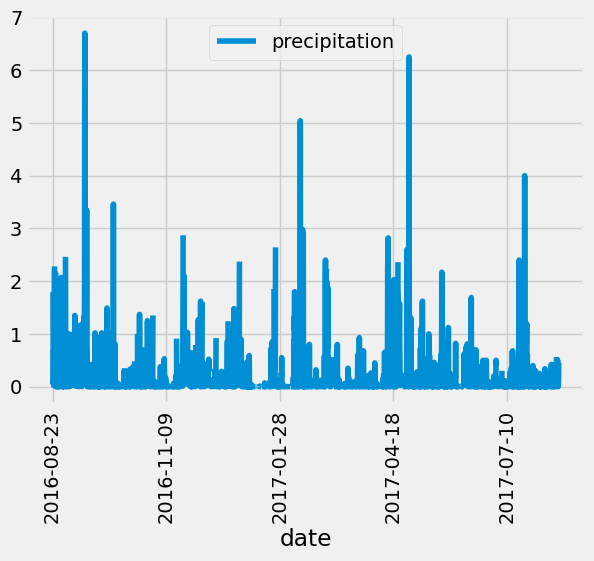

In [92]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
current_date = dt.date(2017, 8, 23)
twelve_months_ago = current_date - dt.timedelta(days=365)
print(twelve_months_ago)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= twelve_months_ago).all()

    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ['date','precipitation'])

# Sort the dataframe by date
df_dates = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = 'date', y = 'precipitation', rot=90)

In [93]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [94]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).all()
print(num_stations)          

[(9,)]


In [95]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station).label('observation_count')).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
temp = session.query(func.min(Measurement.tobs).label('min_temperature'),
                     func.max(Measurement.tobs).label('max_temperature'),
                     func.avg(Measurement.tobs).label('avg_temperature')). filter(Measurement.station == most_active).all()
print(temp)

[(54.0, 85.0, 71.66378066378067)]


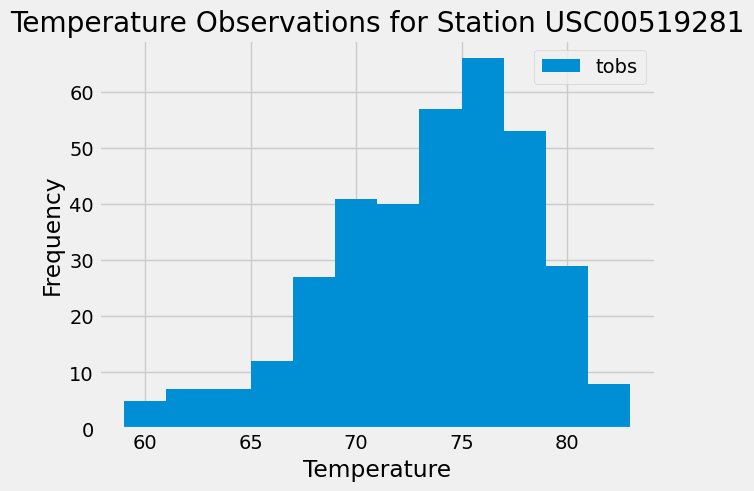

In [97]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query the last 12 months of temperature observation data for the most active station
results = session.query(Measurement.tobs).filter(Measurement.station == most_active).\
                                          filter(Measurement.date >= twelve_months_ago).all()

# Extract the temperature data for plotting
temperatures = [result[0] for result in results]

# Plot the results as a histogram
plt.hist(temperatures, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for Station USC00519281')
plt.legend()
plt.show()

# Close Session

In [98]:
# Close Session
session.close()